In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [34]:
# Import user.csv
user = pd.read_csv('../Datasets/User.csv')
user = user.iloc[:, 1:]

# Import content.csv
content = pd.read_csv('../Datasets/Content.csv')
content = content.iloc[:, 1:]

# Import reaction_types.csv
reaction_types = pd.read_csv('../Datasets/ReactionTypes.csv')
reaction_types = reaction_types.iloc[:, 1:]

# Import reaction.csv
reaction = pd.read_csv('../Datasets/Reactions.csv')
reaction = reaction.iloc[:, 1:]

# Import profile.csv
profile = pd.read_csv('../Datasets/Profile.csv')
profile = profile.iloc[:, 1:]

# Import session.csv
session = pd.read_csv('../Datasets/Session.csv')
session = session.iloc[:, 1:]


#### Cleaning tables

In [35]:
reaction.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [36]:
reaction.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [37]:
reaction = reaction.dropna()

In [38]:
reaction.head()

,Content ID,User ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58


In [39]:
content.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [40]:
content.rename(columns={'Type': 'Content Type'}, inplace=True)

In [41]:
content = content.dropna()

In [42]:
content = content.drop('URL', axis=1)

In [43]:
content.head()

,Content ID,User ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food


In [44]:
content['Category'].unique()


array(['studying', 'healthy eating', 'technology', 'food', 'dogs',
       'soccer', 'public speaking', 'tennis', 'travel', 'education',
       'science', 'veganism', 'cooking', 'animals', 'fitness', 'culture'],
      dtype=object)

In [45]:
user.head()

,User ID,Name,Email
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com
2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com
3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,Kristi Mccarthy,KM@gmail.com
4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Betty Ellis,BE@gmail.com


In [46]:
reaction_types.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


Renaming columns

In [47]:
reaction_types.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [48]:
reaction_types.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


#### Merging reaction and reaction types
It will give us the respctive sentiment of each reaction

In [49]:
df_reactions = reaction.merge(reaction_types,how='inner',on='Reaction Type')

In [50]:
df_reactions.tail()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score
22529,435007a5-6261-4d8b-b0a4-55fdc189754b,d51a3403-8bab-4d88-af4f-a429c6d8c168,adore,2020-10-04 22:26:33,positive,72
22530,435007a5-6261-4d8b-b0a4-55fdc189754b,3663e3e6-3d5c-4ed9-a6af-1e680ec5f34b,adore,2020-09-18 10:50:50,positive,72
22531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,89572273-761e-46f3-8b99-1689d98aac90,adore,2020-10-31 03:58:44,positive,72
22532,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,7bf3ce80-784e-42a0-b06a-dbbd1e31a9b7,adore,2020-06-25 15:12:29,positive,72
22533,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,dcc6000c-ba92-472c-8bc1-9e9ca30b475b,adore,2020-12-17 16:32:57,positive,72


#### Merge reactions with content table
It will give us the content categories and type of each reaction.

In [51]:
df_complete = df_reactions.merge(content[['Content ID', 'Content Type', 'Category']], how='left', on='Content ID')

In [52]:
df_complete.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,2021-04-09 02:46:20,negative,0,photo,studying
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,8b49caad-bcc5-43de-bf40-34a66ff8805c,disgust,2021-03-28 21:15:26,negative,0,photo,healthy eating
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,ef147ea5-9696-44d5-b6c2-a43f62fd8ce2,disgust,2020-08-04 05:40:33,negative,0,photo,healthy eating


In [72]:
pivot_table = pd.pivot_table(df_complete, values=['Content ID'], index='User ID', columns=['Category'], aggfunc='count')
pivot_table.fillna(0, inplace=True)
pivot_table = pivot_table.astype(int)
pivot_table.head()

Content ID                       \
Category                                animals cooking culture dogs   
User ID                                                                
002cd824-10f2-447c-8d1c-940325a1cdf4          4       1       5    2   
007a1366-a46f-40f1-9ba5-01245aeaf20f          2       0       2    1   
03e3a23a-a77a-41da-9ecd-3f2ff9e5bc90          3       2       2    2   
04e52602-e370-4a99-bfda-f0c1655058da          1       1       4    1   
052faed2-37ac-4a2c-ba6f-2657322e4fa5          4       1       4    2   

                                                                            \
Category                             education fitness food healthy eating   
User ID                                                                      
002cd824-10f2-447c-8d1c-940325a1cdf4         1       3    4              1   
007a1366-a46f-40f1-9ba5-01245aeaf20f         5       2    2              5   
03e3a23a-a77a-41da-9ecd-3f2ff9e5bc90         2       1    5              2   
04e52602-e370-4a99-bfda-f0c1655058da         3       1    3              3   
052faed2-37ac-4a2c-ba6f-2657322e4fa5         2       2    3              5   

                                                                              \
Category                             public speaking science soccer studying   
User ID                                                                        
002cd824-10f2-447c-8d1c-940325a1cdf4               1       2      2        4   
007a1366-a46f-40f1-9ba5-01245aeaf20f               1       2      2        2   
03e3a23a-a77a-41da-9ecd-3f2ff9e5bc90               0       1      3        3   
04e52602-e370-4a99-bfda-f0c1655058da               3       0      0        2   
052faed2-37ac-4a2c-ba6f-2657322e4fa5               1       4      2        1   

                                                                        
Category                             technology tennis travel veganism  
User ID                                                                 
002cd824-10f2-447c-8d1c-940325a1cdf4          5      4      2        2  
007a1366-a46f-40f1-9ba5-01245aeaf20f          2      0      1        2  
03e3a23a-a77a-41da-9ecd-3f2ff9e5bc90          3      1      2        1  
04e52602-e370-4a99-bfda-f0c1655058da          1      4      3        3  
052faed2-37ac-4a2c-ba6f-2657322e4fa5          5      2      1        7

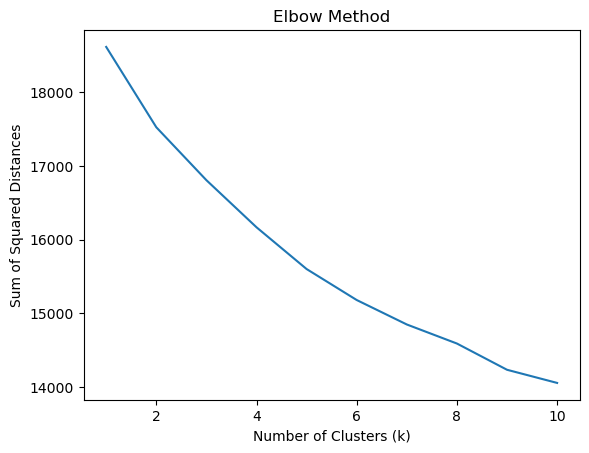

In [54]:
# Initialize an empty list to store the sum of squared distances
sse = []

# Perform k-means clustering for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pivot_table)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()


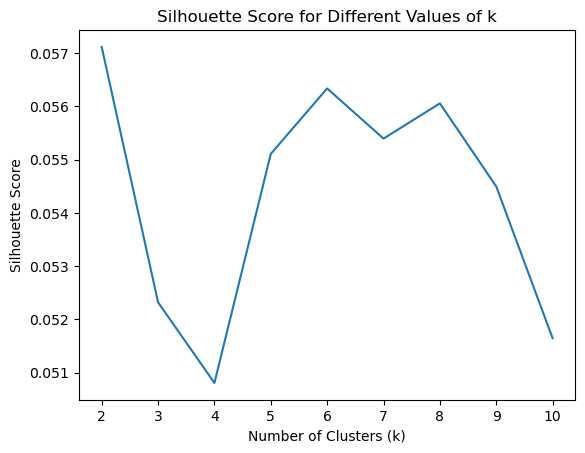

In [55]:
from sklearn.metrics import silhouette_score
# Perform k-means clustering for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pivot_table)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(pivot_table, labels))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()


In [73]:
# Perform k-means clustering with the desired number of clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(pivot_table)
pivot_table = pivot_table['Content ID']
# Add the clusters column to the pivot_table
pivot_table['clusters'] = kmeans.labels_


In [74]:
pivot_table.head()

Category,animals,cooking,culture,dogs,education,fitness,food,healthy eating,public speaking,science,soccer,studying,technology,tennis,travel,veganism,clusters
User ID,,,,,,,,,,,,,,,,,
002cd824-10f2-447c-8d1c-940325a1cdf4,4,1,5,2,1,3,4,1,1,2,2,4,5,4,2,2,3
007a1366-a46f-40f1-9ba5-01245aeaf20f,2,0,2,1,5,2,2,5,1,2,2,2,2,0,1,2,2
03e3a23a-a77a-41da-9ecd-3f2ff9e5bc90,3,2,2,2,2,1,5,2,0,1,3,3,3,1,2,1,3
04e52602-e370-4a99-bfda-f0c1655058da,1,1,4,1,3,1,3,3,3,0,0,2,1,4,3,3,2
052faed2-37ac-4a2c-ba6f-2657322e4fa5,4,1,4,2,2,2,3,5,1,4,2,1,5,2,1,7,3


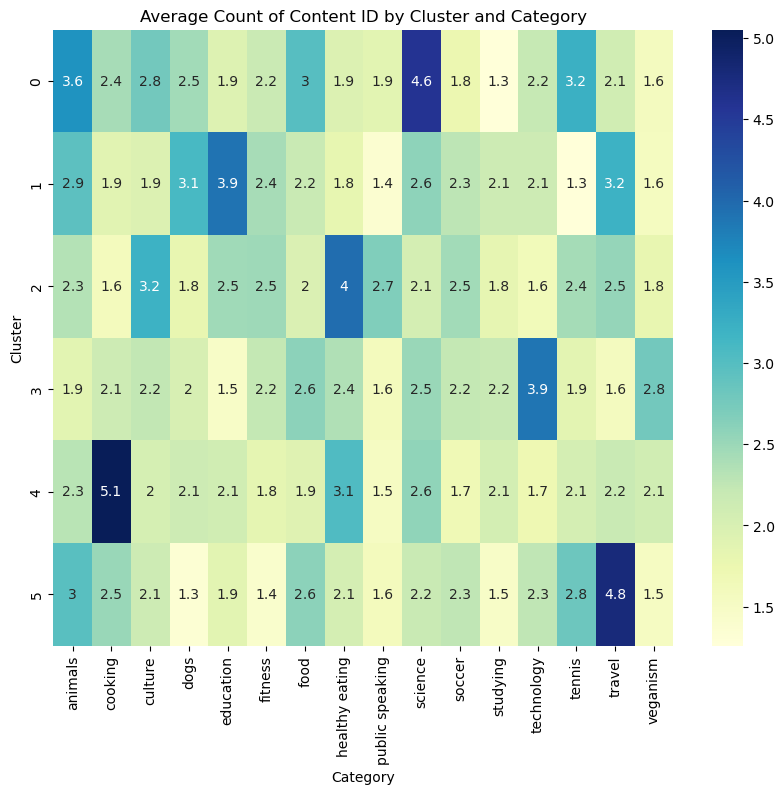

In [75]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table.groupby('clusters').mean(), annot=True, cmap='YlGnBu')
plt.xlabel('Category')
plt.ylabel('Cluster')
plt.title('Average Count of Content ID by Cluster and Category')
plt.savefig('../output/heatmap_reaction_clusters_by_content_category.png')  # Save the plot image
plt.show()


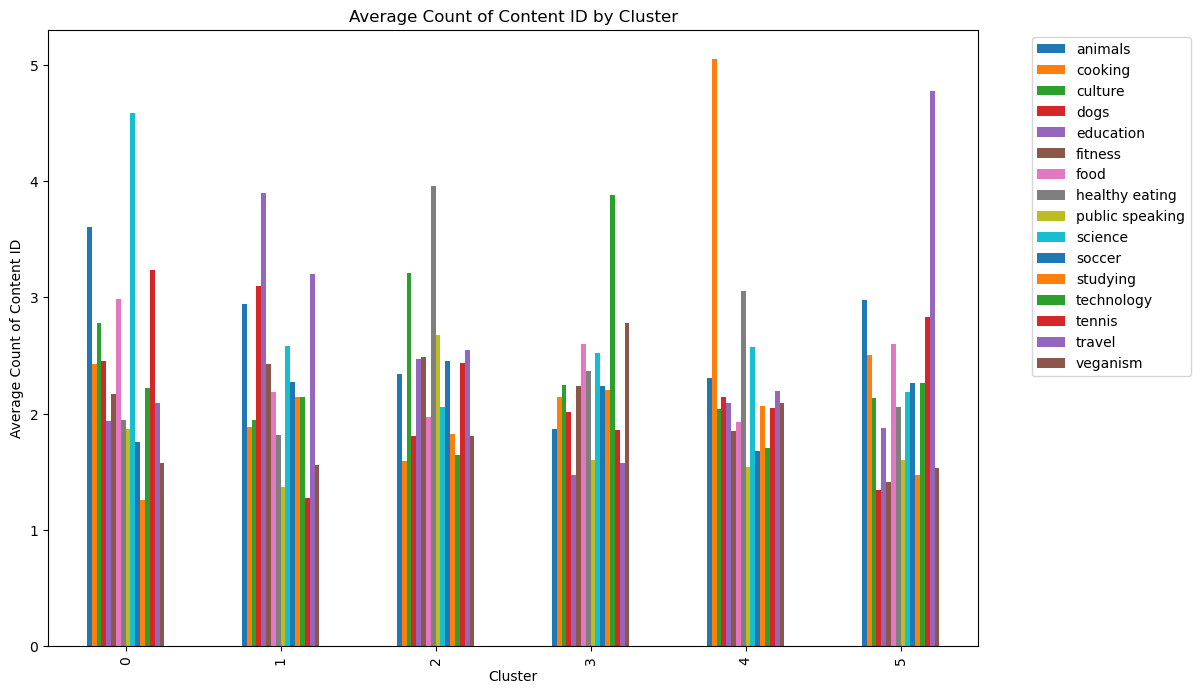

In [77]:
pivot_table.groupby('clusters').mean().plot(kind='bar', figsize=(12, 8))
plt.xlabel('Cluster')
plt.ylabel('Average Count of Content ID')
plt.title('Average Count of Content ID by Cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The heatmap show the average viewership of each content category.

This will help Social Buzz to give more targeted content and ads to the users.

Each cluster clearly shows the most popular content categories.


For example cluster 0 has the highest average reactions for cooking content category.

In [27]:
pivot_table = pivot_table.reset_index()
pivot_table = pivot_table.rename(columns={'User ID': 'User ID'})

In [28]:
pivot_table.head()

Category,User ID,Studying,animals,cooking,culture,dogs,education,fitness,food,healthy eating,public speaking,science,soccer,studying,technology,tennis,travel,veganism,clusters
0,002cd824-10f2-447c-8d1c-940325a1cdf4,0,4,1,5,2,1,3,4,1,1,2,2,4,5,4,2,2,3
1,007a1366-a46f-40f1-9ba5-01245aeaf20f,0,2,0,2,1,5,2,2,5,1,2,2,2,2,0,1,2,1
2,03e3a23a-a77a-41da-9ecd-3f2ff9e5bc90,0,3,2,2,2,2,1,5,2,0,1,3,3,3,1,2,1,0
3,04e52602-e370-4a99-bfda-f0c1655058da,0,1,1,4,1,3,1,3,3,3,0,0,2,1,4,3,3,1
4,052faed2-37ac-4a2c-ba6f-2657322e4fa5,0,4,1,4,2,2,2,3,5,1,4,2,1,5,2,1,7,3


In [25]:
pivot_table.shape

(500, 18)

In [29]:
pivot_table.to_csv('reactions_by_category.csv', index=True)

In [30]:
profile.head()

,User ID,Interests,Age
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"[0, 1]",41
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,['tennis'],23
2,a8229d24-f219-4930-a382-24049a8f73bb,"['fitness', 'cooking', 'animals', 'travel']",25
3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,"['technology', 'culture', 'veganism']",2
4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,['education'],44


In [31]:
session.head()

,User ID,Device,Duration
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Microsoft,11
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Apple,51
2,a8229d24-f219-4930-a382-24049a8f73bb,HTC,25
3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,Motorola,68
4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Huawei,57


In [4]:
df = content.merge(profile, how='left', on='User ID')
df = df.merge(session, how='left', on='User ID')
df = df.merge(reaction, how='left', on='Content ID')
df = df.rename(columns={'Type_x':'Cont_Type','Type_y':'Type'})
df = df.merge(reaction_types, how='left', on='Type')
df = df.rename(columns={'Type':'React_Type'})

In [5]:
df.drop("Duration",axis=1,inplace=True)
df.drop("Device",axis=1,inplace=True)
df.drop('URL',axis=1,inplace=True)

In [6]:
df.head()

,Content ID,User ID,Cont_Type,Category,Interests,Age,React_Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,"['education', 'studying']",13,NaN,2021-04-22 15:17:15,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,"['education', 'studying']",13,disgust,2020-11-07 09:43:50,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,"['education', 'studying']",13,dislike,2021-06-17 12:22:51,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,"['education', 'studying']",13,scared,2021-04-18 05:13:58,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,"['education', 'studying']",13,disgust,2021-01-06 19:13:01,negative,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25573 entries, 0 to 25572
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Content ID  25573 non-null  object 
 1   User ID     25573 non-null  object 
 2   Cont_Type   25573 non-null  object 
 3   Category    25573 non-null  object 
 4   Interests   25573 non-null  object 
 5   Age         25573 non-null  int64  
 6   React_Type  24573 non-null  object 
 7   Datetime    25553 non-null  object 
 8   Sentiment   24573 non-null  object 
 9   Score       24573 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 2.1+ MB


In [8]:
df.isnull().sum()

Content ID       0
User ID          0
Cont_Type        0
Category         0
Interests        0
Age              0
React_Type    1000
Datetime        20
Sentiment     1000
Score         1000
dtype: int64

In [9]:
df1 = df.dropna()

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25572
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Content ID  24573 non-null  object 
 1   User ID     24573 non-null  object 
 2   Cont_Type   24573 non-null  object 
 3   Category    24573 non-null  object 
 4   Interests   24573 non-null  object 
 5   Age         24573 non-null  int64  
 6   React_Type  24573 non-null  object 
 7   Datetime    24573 non-null  object 
 8   Sentiment   24573 non-null  object 
 9   Score       24573 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 2.1+ MB


In [11]:
df1['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', 'Culture', '"food"', 'Food',
       '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [17]:
df1['Category'] = df1['Category'].replace('"', '', regex = True)
df1['Category']= df1['Category'].str.lower()

<ipython-input-17-22bff12d1b42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category'] = df1['Category'].replace('"', '', regex = True)
<ipython-input-17-22bff12d1b42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category']= df1['Category'].str.lower()


In [13]:
df1['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [14]:
df1.to_csv('data.csv', index = False)

In [15]:
df1.groupby('Category').agg({"React_Type" : "count"}).reset_index().sort_values(by='React_Type', ascending=False).head(5)

,Category,React_Type
0,animals,1897
9,science,1796
7,healthy eating,1717
6,food,1699
12,technology,1698


In [16]:
df1.groupby('Category').agg({'Score': 'sum'}).reset_index().sort_values(by="Score", ascending=False).head()

,Category,Score
0,animals,74965.0
9,science,71168.0
7,healthy eating,69339.0
12,technology,68738.0
6,food,66676.0
